## Hamoye Stage D
### Planet: Understanding the Amazon from Space
Planet: Understanding the Amazon from Space
Target: Use satellite data to track the human footprint in the Amazon rainforest

Source: https://www.kaggle.com/c/planet-understanding-the-amazon-from-space

**Unzipping data folder in the colab root directory**

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import training csv file
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train_df =  pd.read_csv("/kaggle/input/planets-dataset/planet/planet/train_classes.csv")
train_df.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


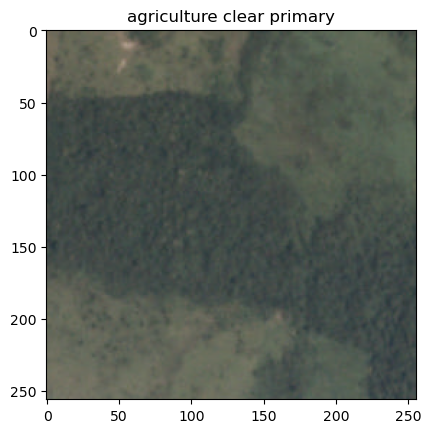

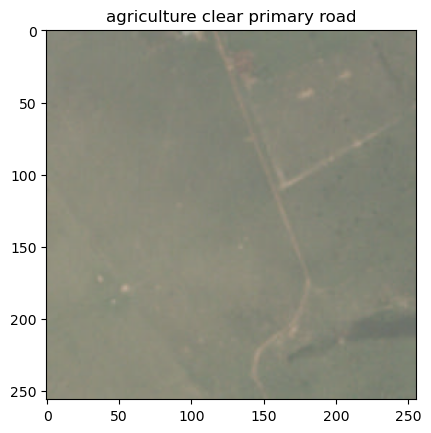

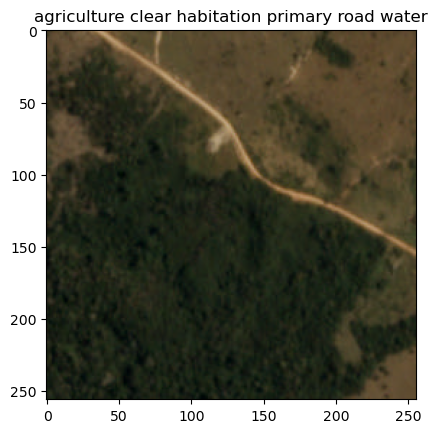

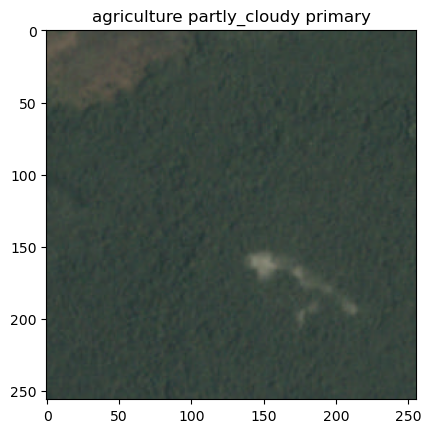

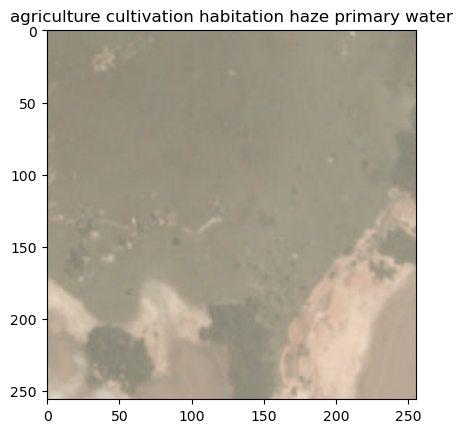

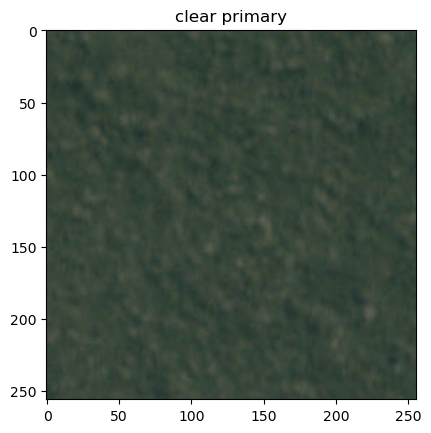

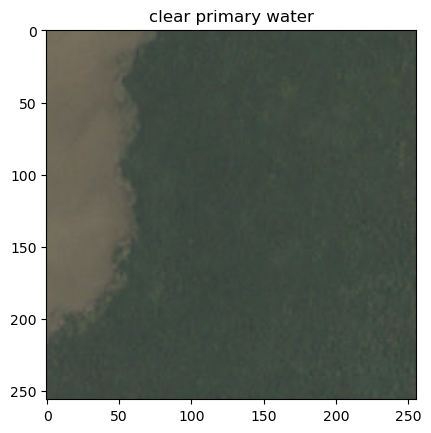

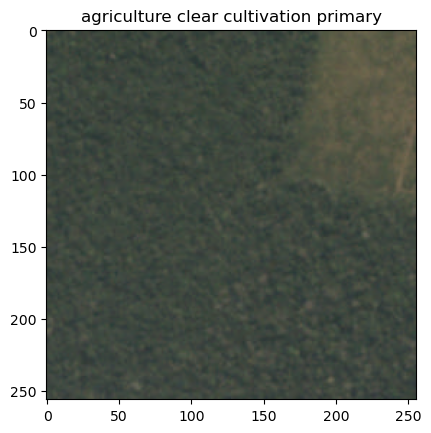

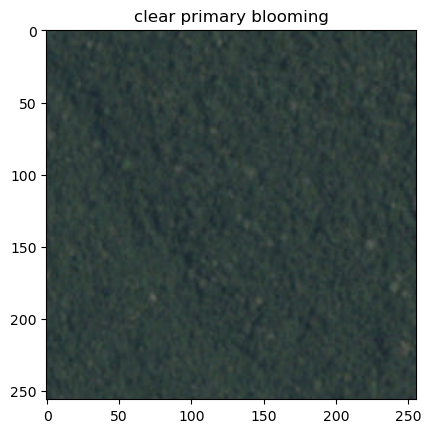

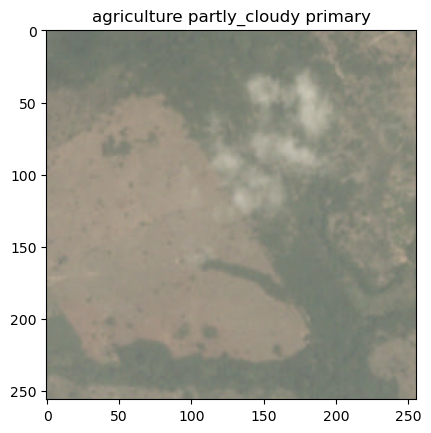

In [3]:
# Let us visualize some of the random images and corresponding labels
import random
root = "/kaggle/input/planets-dataset/planet/planet/train-jpg"
train_path = [os.path.join(root,x + ".jpg") for x in train_df["image_name"]]
labels = train_df["tags"]
pairs = list(zip(train_path, labels))  # make pairs out of the two lists
pairs = random.sample(pairs, 10)  # pick 3 random pairs
image_paths, labels = zip(*pairs)
for image_path,label_name in zip(image_paths,labels):
  read_image = plt.imread(image_path)
  plt.title(label_name)
  plt.imshow(read_image)
  plt.show()




In [4]:
#Let us know the number of unique labels
#identify the label column
label_column = "tags"
#Extract the labels
labels = train_df[label_column].tolist()
#Remove duplicates
unique_labels = list(set(labels))
#print the unique label list
print(unique_labels)

['bare_ground clear conventional_mine primary road', 'artisinal_mine bare_ground partly_cloudy primary road', 'haze road water', 'agriculture clear primary road', 'agriculture clear cultivation habitation primary', 'cloudy', 'cultivation partly_cloudy primary road', 'agriculture partly_cloudy primary road water', 'agriculture clear primary slash_burn', 'clear conventional_mine habitation primary', 'haze primary selective_logging', 'agriculture artisinal_mine clear habitation road water', 'agriculture clear water', 'artisinal_mine bare_ground clear road water', 'artisinal_mine clear cultivation primary road water', 'bare_ground cultivation haze primary', 'artisinal_mine clear primary', 'agriculture bare_ground clear cultivation habitation primary road water', 'agriculture clear primary road selective_logging', 'agriculture blooming cultivation partly_cloudy primary selective_logging', 'agriculture clear cultivation primary blooming', 'agriculture bare_ground clear habitation primary roa

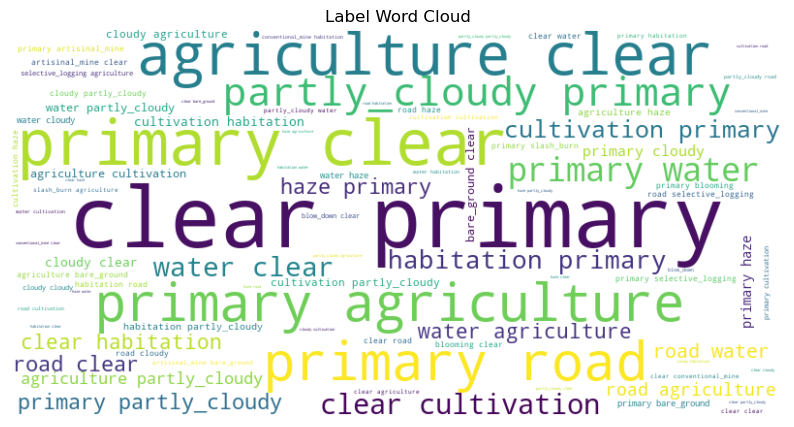

In [5]:
#visualizing the generated labels 
from wordcloud import WordCloud
#Join the labels into a single string
label_text = " ".join(labels)
#create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(label_text)
#pict the word cloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Label Word Cloud")
plt.show()

In [6]:
# Generating a list of all specific unique labels
label_list = []
for tag_str in train_df.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)
label_list


['haze',
 'primary',
 'agriculture',
 'clear',
 'water',
 'habitation',
 'road',
 'cultivation',
 'slash_burn',
 'cloudy',
 'partly_cloudy',
 'conventional_mine',
 'bare_ground',
 'artisinal_mine',
 'blooming',
 'selective_logging',
 'blow_down']

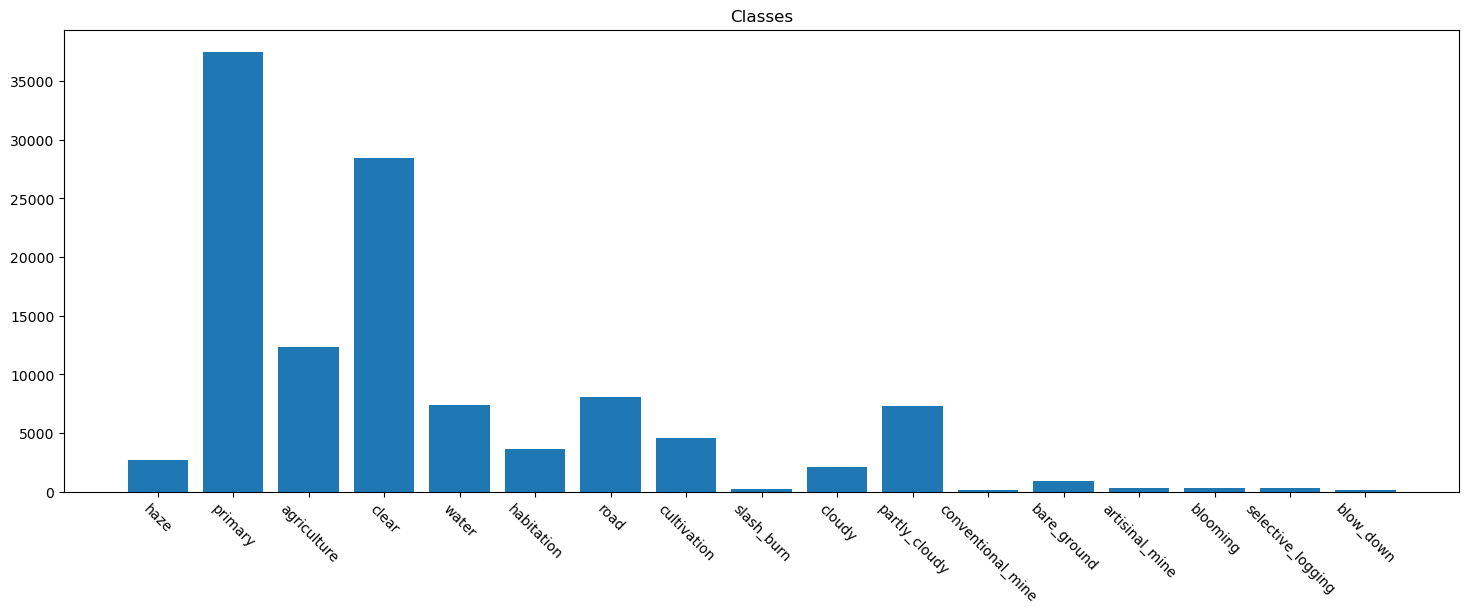

In [7]:
# Visualize number of unique labels
counts = {}
splitted_tags = train_df['tags'].map(lambda x: x.split(' '))
for labels in splitted_tags.values:
    for label in labels:
        counts[label] = counts[label] + 1  if label in counts else 0

plt.figure(figsize=(18, 6))
plt.title('Classes')
idxs = range(len(counts.values()))
plt.xticks(idxs, counts.keys(), rotation=-45)
plt.bar(idxs, counts.values());

In [8]:
# Let us onehot features for every label
for label in label_list:
    train_df[label] = train_df['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
# Display head
train_df.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


<Axes: >

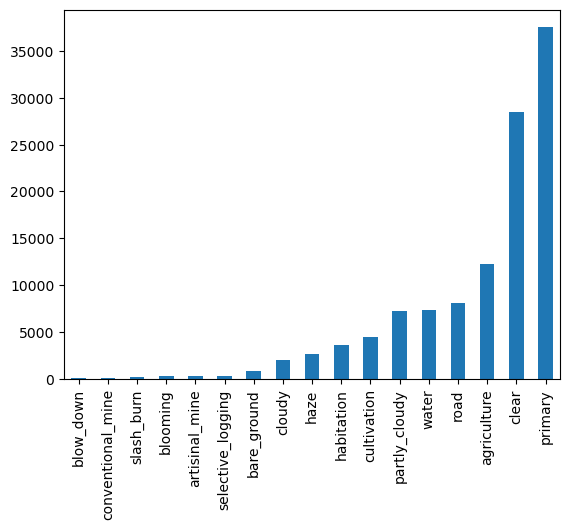

In [9]:
# Plotting number of instances for each class
train_df[label_list].sum().sort_values().plot.bar()

**Generate training and validation data**

In [10]:
data = train_df.copy()

In [11]:
flatten = lambda l: [item for sublist in l for item in sublist]

#using the lambda function to create our labels
labels = list(set(flatten([l.split(' ') for l in data['tags'].values])))

#Creating our label map
label_map = {l: i for i, l in enumerate(labels)}

In [12]:
from itertools import chain
labels_list = list(chain.from_iterable([tags.split(" ") for tags in data['tags'].values]))
labels_set = set(labels_list)
print("We have {} unique labels including {}".format(len(labels_set), labels_set))


We have 17 unique labels including {'conventional_mine', 'cloudy', 'partly_cloudy', 'bare_ground', 'artisinal_mine', 'selective_logging', 'cultivation', 'slash_burn', 'blow_down', 'haze', 'road', 'agriculture', 'habitation', 'water', 'blooming', 'primary', 'clear'}


In [13]:
# converting the tags columns into one_hot_vectors
for tag in labels_set:
    data[tag] = data['tags'].apply(lambda x: 1 if tag in x.split() else 0)
    
# adding '.jpg' extension to 'image_name'
data['image_name'] = data['image_name'].apply(lambda x: '{}.jpg'.format(x)) 
data.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0.jpg,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1.jpg,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2.jpg,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3.jpg,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4.jpg,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [14]:
import tensorflow
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import fbeta_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, History, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras import preprocessing
from keras.models import Sequential
tensorflow.keras.preprocessing.image.ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [15]:
# Gnerating training and validation images
train_path = "/kaggle/input/planets-dataset/planet/planet/train-jpg"
y_col = list(data.columns[2:]) 
train_image_gen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,validation_split=0.2)

# creating the training set
training_set = train_image_gen.flow_from_dataframe(dataframe=data, directory=train_path, x_col='image_name', y_col=y_col, \
       target_size=(224,224), class_mode='raw', seed=0, batch_size=128, subset='training')

# creating the validation set
validation_set = train_image_gen.flow_from_dataframe(dataframe=data, directory=train_path, x_col='image_name', y_col=y_col, \
       target_size=(224,224), class_mode='raw', seed=0, batch_size=128, subset='validation')

Found 32384 validated image filenames.
Found 8095 validated image filenames.


In [16]:
from keras import backend as K
# defining a function to help calculate the fbeta_score
def fbeta_score_K(y_true, y_pred):
    beta_squared = 4

    tp = K.sum(y_true * y_pred) + K.epsilon()
    fp = K.sum(y_pred) - tp
    fn = K.sum(y_true) - tp

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    result = (beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon())

    return result

**Training pretrained model:VGG16**

In [17]:
import tensorflow.keras as keras
# Loading the pre-trained VGG16 architecture module
from tensorflow.keras.applications.vgg16 import VGG16



# Extract the pre - trained architecture
vgg_model = VGG16(input_shape =(224,224,3),include_top =False,weights ='imagenet')
vgg_model.summary()

# Get the output of the base_model formed above
x = vgg_model.output
x = Flatten()(x)
x = Dense (1000 , activation ='relu')(x)
predictions = Dense (17 , activation ='sigmoid')(x)
model = Model(inputs= vgg_model.input,outputs = predictions)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
history = History()
callbacks = [ EarlyStopping(monitor='val_loss',
                           patience=3,
                           verbose=0)]
             

# setting step size for training and validation image data
step_train_size = int(np.ceil(training_set.samples / training_set.batch_size))
step_val_size = int(np.ceil(validation_set.samples / validation_set.batch_size))

#compiling the model
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy', fbeta_score_K])

# fitting the model
history = model.fit(x=training_set, steps_per_epoch=step_train_size, validation_data=validation_set, validation_steps=step_val_size,
         epochs=10, callbacks=callbacks)

Epoch 1/10
253/253 [==============================] - 507s 2s/step - loss: 0.2424 - accuracy: 0.8485 - fbeta_score_K: 0.6254 - val_loss: 0.1761 - val_accuracy: 0.8590 - val_fbeta_score_K: 0.6876
Epoch 2/10
253/253 [==============================] - 463s 2s/step - loss: 0.1650 - accuracy: 0.7797 - fbeta_score_K: 0.7156 - val_loss: 0.1523 - val_accuracy: 0.6871 - val_fbeta_score_K: 0.7378
Epoch 3/10
253/253 [==============================] - 461s 2s/step - loss: 0.1519 - accuracy: 0.7445 - fbeta_score_K: 0.7380 - val_loss: 0.1463 - val_accuracy: 0.7932 - val_fbeta_score_K: 0.7343
Epoch 4/10
253/253 [==============================] - 461s 2s/step - loss: 0.1397 - accuracy: 0.7611 - fbeta_score_K: 0.7571 - val_loss: 0.1375 - val_accuracy: 0.7398 - val_fbeta_score_K: 0.7683
Epoch 5/10
253/253 [==============================] - 461s 2s/step - loss: 0.1332 - accuracy: 0.7785 - fbeta_score_K: 0.7685 - val_loss: 0.1303 - val_accuracy: 0.7985 - val_fbeta_score_K: 0.7670
Epoch 6/10
253/253 [=====

In [19]:
# Evaluate model on validation data
scores = model.evaluate(validation_set)

64/64 [==============================] - 35s 538ms/step - loss: 0.1177 - accuracy: 0.7974 - fbeta_score_K: 0.8075


In [29]:
# Save model
import os
from tensorflow.keras.models import Sequential, model_from_json
# setting the output director
#changing the current working directory
#os.chdir("kaggle/working/")
# serialize model to JSON
model_json = model.to_json()
#defining the model path
#model_path = os.path.join(output_dir, "new_vgg16_1_model.json")
# writing the model JSON to a file
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#saving the model's weight as well.
model.save_weights("model.h5")


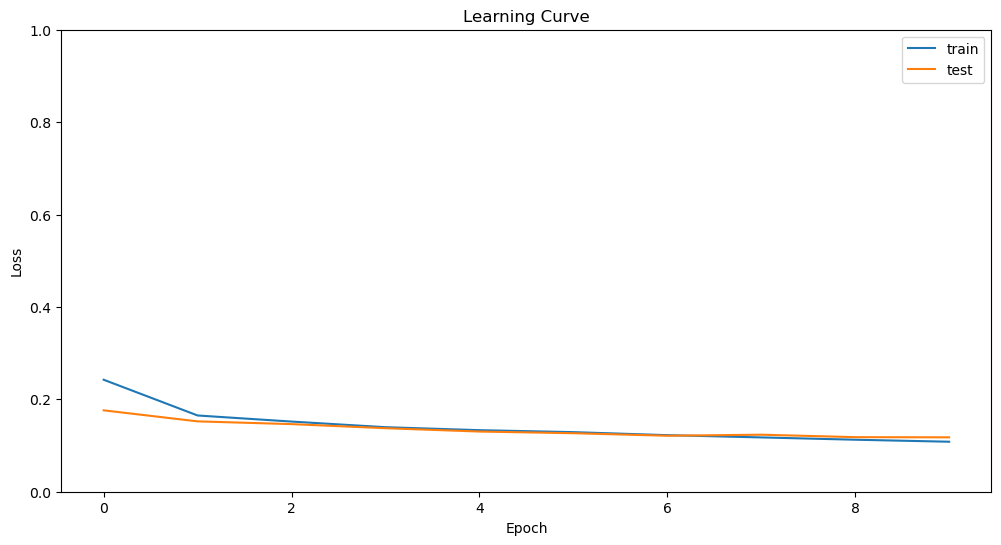

In [30]:
#plot learning curve
def learning_curve(model_fit, key='acc', ylim=(0.8, 1.01)):
    plt.figure(figsize=(12,6))
    plt.plot(model_fit.history[key])
    plt.plot(model_fit.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    plt.ylim(ylim)
    plt.legend(['train', 'test'], loc='best')
    plt.show()
learning_curve(history,key="loss",ylim=(0,1))  

**Making predictions on test data**

In [31]:
# Read  sample submission csv
sample_submission = pd.read_csv("/kaggle/input/planets-dataset/planet/planet/sample_submission.csv")


In [32]:
#making a copy of the sample submission
sample_copy = sample_submission.copy()
sample_copy['image_name'] = sample_copy['image_name'].apply(lambda x: '{}.jpg'.format(x))
sample_copy.head()


# creating a dataframe for the first 40669 images since we have 2 files for the testing set
test1 = sample_copy.iloc[:40669]['image_name'].reset_index().drop('index', axis=1)
test1.head()

,image_name
0,test_0.jpg
1,test_1.jpg
2,test_2.jpg
3,test_3.jpg
4,test_4.jpg


**Generate first set of test data and making predictions**

In [33]:
test_image_gen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# generating the image data for the first 40669 images in the sample submission dataframe
test_path = "/kaggle/input/planets-dataset/planet/planet/test-jpg"
test_gen = test_image_gen.flow_from_dataframe(dataframe=test1, \
            directory=test_path, x_col='image_name', y_col=None, \
            batch_size=128, shuffle=False, class_mode=None, target_size=(224,224))


step_test_size1 = int(np.ceil(test_gen.samples / test_gen.batch_size)) 

Found 40669 validated image filenames.


In [34]:
test_gen.reset() # reseting the generator to be sure of avoiding shuffling
pred = model.predict(test_gen, steps=step_test_size1, verbose=1) # Making predictions for test data

318/318 [==============================] - 176s 553ms/step


In [35]:
df = train_df.copy()
unique_labels = set()
def append_labels(tags):
    for tag in tags.split():
        unique_labels.add(tag)

train_classes = df.copy()
train_classes['tags'].apply(append_labels)
unique_labels = list(unique_labels)
print(unique_labels)

['conventional_mine', 'cloudy', 'partly_cloudy', 'bare_ground', 'artisinal_mine', 'selective_logging', 'cultivation', 'slash_burn', 'blow_down', 'haze', 'road', 'agriculture', 'habitation', 'water', 'blooming', 'primary', 'clear']


In [37]:
df.columns

Index(['image_name', 'tags', 'haze', 'primary', 'agriculture', 'clear',
       'water', 'habitation', 'road', 'cultivation', 'slash_burn', 'cloudy',
       'partly_cloudy', 'conventional_mine', 'bare_ground', 'artisinal_mine',
       'blooming', 'selective_logging', 'blow_down'],
      dtype='object')

In [38]:
test_file_names1 = test_gen.filenames # storing the filenames (images names) of the first 40669 images names in \
# the sample submission dataframe as ordered in the prediction as a variable
        
# converting the predictions of the first 40669 to tag names
pred_tags = pd.DataFrame(pred)
pred_tags = pred_tags.apply(lambda x: ' '.join(np.array(unique_labels)[x > 0.5]), axis=1)

# converting the predictions of the first 40669 to a dataframe
import pandas as pd
first_result = pd.DataFrame({'image_name': test_file_names1, 'tags': pred_tags})
print(first_result.head())

   image_name                tags
0  test_0.jpg  cloudy bare_ground
1  test_1.jpg  cloudy bare_ground
2  test_2.jpg         cloudy road
3  test_3.jpg  cloudy bare_ground
4  test_4.jpg         cloudy road


**Generate additional test data and making predictions**

In [39]:
# selecting the remaining 'image_name'(s) from the submission_sample dataframe to generate image data from 
# test_additional_path
test_additional = sample_copy.iloc[40669:]['image_name'].reset_index().drop('index', axis=1)
test_additional.head()

,image_name
0,file_0.jpg
1,file_1.jpg
2,file_10.jpg
3,file_100.jpg
4,file_1000.jpg


In [42]:
# initializing an image data generator object for the remaining images in the sample submission dataframe
test_image_gen2 = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_additional_path = "/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional"

# generating the image data for the remaining images in the sample submission dataframe
test_gen2 = test_image_gen2.flow_from_dataframe(dataframe=test_additional, \
            directory=test_additional_path, x_col='image_name', \
            y_col=None, batch_size=128, shuffle=False, class_mode=None, target_size=(224,224))

# setting the step size for the testing set for the remaining images in the sample submission dataframe
step_test_size2 = int(np.ceil(test_gen2.samples / test_gen2.batch_size))


test_gen2.reset() # reseting the generator to be sure of avoiding shuffling
pred2 = model.predict(test_gen2, steps=step_test_size2, verbose=1) 

Found 20522 validated image filenames.
161/161 [==============================] - 87s 544ms/step


In [43]:
test_file_names2 = test_gen2.filenames 
        
# converting the predictions of the remaining images to tag names
pred_tags2 = pd.DataFrame(pred2)
pred_tags2 = pred_tags2.apply(lambda x: ' '.join(np.array(unique_labels)[x > 0.5]), axis=1)

# converting the predictions of the remaining to a dataframe
second_result= pd.DataFrame({'image_name': test_file_names2, 'tags': pred_tags2})
print(second_result.head())

      image_name                                   tags
0     file_0.jpg                     cloudy bare_ground
1     file_1.jpg  cloudy partly_cloudy cultivation road
2    file_10.jpg                                 cloudy
3   file_100.jpg      cloudy bare_ground artisinal_mine
4  file_1000.jpg                     cloudy bare_ground


In [44]:
# joining the result of the test data and the additional files as final predictions
final_result = pd.concat([first_result,second_result]) 
final_result = final_result.reset_index().drop('index', axis=1)
final_result.head()

,image_name,tags
0,test_0.jpg,cloudy bare_ground
1,test_1.jpg,cloudy bare_ground
2,test_2.jpg,cloudy road
3,test_3.jpg,cloudy bare_ground
4,test_4.jpg,cloudy road


In [46]:
# removing the jpegs extension back from the dataframe
final_result['image_name'] = final_result['image_name'].apply(lambda x: x[:-4])
final_result.head(20)

,image_name,tags
0,te,cloudy bare_ground
1,te,cloudy bare_ground
2,te,cloudy road
3,te,cloudy bare_ground
4,te,cloudy road
5,te,cloudy bare_ground
6,te,cloudy partly_cloudy bare_ground selective_log...
7,te,cloudy partly_cloudy bare_ground selective_log...
8,te,cloudy bare_ground
9,te,conventional_mine cloudy


In [55]:
#Save submission file
final_result.to_csv("submission.csv",index=False)